<a href="https://colab.research.google.com/github/introspective321/Image_Retrieval_CIFAR-10/blob/experiment/Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [6]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz

--2024-03-17 10:51:16--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  65.4MB/s    in 2.5s    

2024-03-17 10:51:19 (65.4 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
data_batch_1 = unpickle(r'/content/cifar-10-batches-py/data_batch_1')
print(type(data_batch_1))
print("--------------------------")
print(data_batch_1.keys())
print("--------------------------")
for item in data_batch_1:
    print(item, type(data_batch_1[item]))
print("--------------------------")
print("Labels:", set(data_batch_1['labels']))

<class 'dict'>
--------------------------
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
--------------------------
batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>
--------------------------
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [59]:
import numpy as np
batch_1 = unpickle('/content/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('/content/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('/content/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('/content/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('/content/cifar-10-batches-py/data_batch_5')
test_batch =unpickle('/content/cifar-10-batches-py/test_batch')

X_train = np.concatenate([batch_1['data'], batch_2['data'], batch_3['data'], batch_4['data'], batch_5['data']], axis=0)
y_train = np.concatenate([batch_1['labels'], batch_2['labels'], batch_3['labels'], batch_4['labels'], batch_5['labels']], axis=0)

X_test = test_batch['data']
y_test = test_batch['labels']

print(X_train)
print(y_train)

[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]
 ...
 [ 35  40  42 ...  77  66  50]
 [189 186 185 ... 169 171 171]
 [229 236 234 ... 173 162 161]]
[6 9 9 ... 9 1 1]


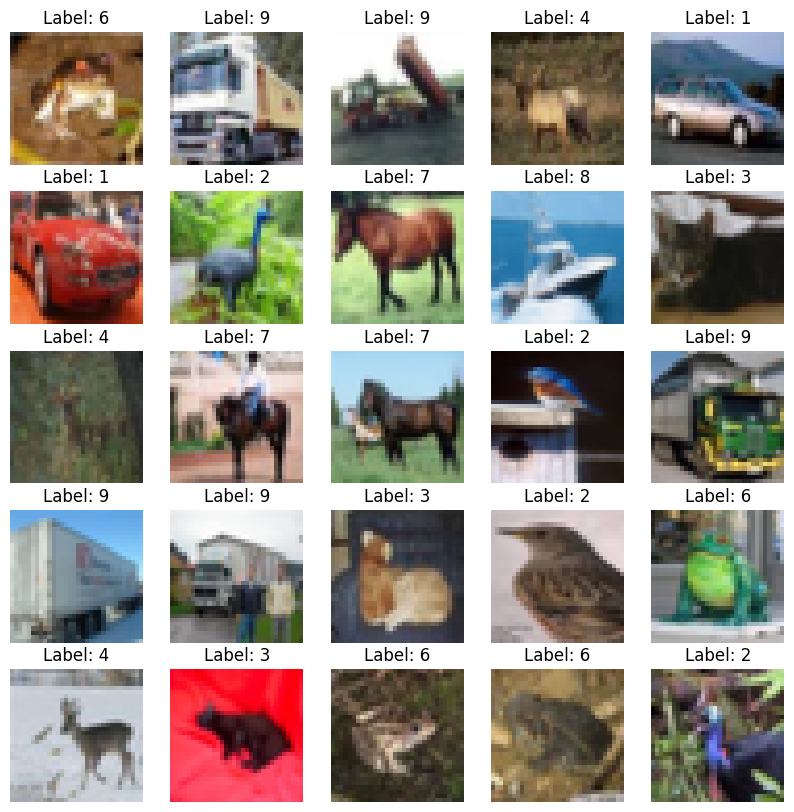

In [60]:
import matplotlib.pyplot as plt

# Reshape the image arrays into the appropriate format
X_train_reshaped = X_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Plot the first few images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train_reshaped[i])
    plt.axis('off')
    plt.title(f"Label: {y_train[i]}")
plt.show()


In [61]:
combined_data = list(zip(X_train, y_train))
np.random.shuffle(combined_data)
X_train_shuffled, y_train_shuffled = zip(*combined_data)

# Convert back to numpy arrays
X_train = np.array(X_train_shuffled)
y_train = np.array(y_train_shuffled)

In [62]:
X_train = X_train/255
X_test = X_test/255